In [1]:
# Data processing
import pandas as pd
import numpy as np
# Text preprocessiong
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()
# Topic model
from bertopic import BERTopic
# Dimension reduction
from umap import UMAP

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chasstikeleather/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/chasstikeleather/nltk_data...
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/chasstikeleather/nltk_data...


In [2]:
text_df = pd.read_csv('../data/raw/CryptoPulls2023-02-22.csv')

In [5]:
stopwords = nltk.corpus.stopwords.words('english')

In [20]:
text_df['review_without_stopwords'] = text_df['comments'].apply(lambda x: ' '.join([w for w in x.split() if w.lower() not in stopwords]))
# Lemmatization
text_df['review_lemmatized'] = text_df['review_without_stopwords'].apply(lambda x: ' '.join([wn.lemmatize(w) for w in x.split() if w not in stopwords]))
# Take a look at the data
#text_df.head()

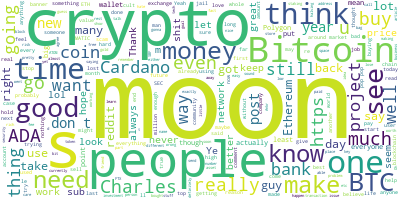

In [21]:
from wordcloud import WordCloud

long_string = ' '.join(list(text_df.review_lemmatized))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [24]:
freqs = WordCloud().process_text(' '.join(list(text_df.review_lemmatized)))

In [33]:
words = []
counts = []
for i in freqs:
    words.append(i)
    counts.append(freqs.get(i))

In [34]:
word_dict = { 'words': words,
             'counts' : counts}

In [41]:
word_freqs = pd.DataFrame(word_dict)
word_freqs = word_freqs.sort_values(by='counts', ascending=False)
word_freqs.head(10)
words_for_pic = word_freqs['words'][:10]
words_for_pic = " ".join(list(words_for_pic))

In [14]:
umap_model = UMAP(n_neighbors=15, 
                  n_components=5, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=813)
# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model,
                       language="english",
                       calculate_probabilities=True,
                       nr_topics=15)
# Run BERTopic model
topics, probabilities = topic_model.fit_transform(text_df['review_lemmatized'])

In [15]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,1567,-1_like_people_get_im
1,0,1205,0_charles_like_polygon_cardano
2,1,692,1_crypto_bitcoin_bank_btc
3,2,242,2_moon_moons_atom_cosmos
4,3,189,3_21_goal_10_million
5,4,100,4_yes_lol_right_that
6,5,81,5_addiction_addicted_moon_addict
7,6,58,6_microsoft_company_partnership_tech
8,7,43,7_rich_lie_poor_lying
9,8,33,8_cult_leader_its_charles


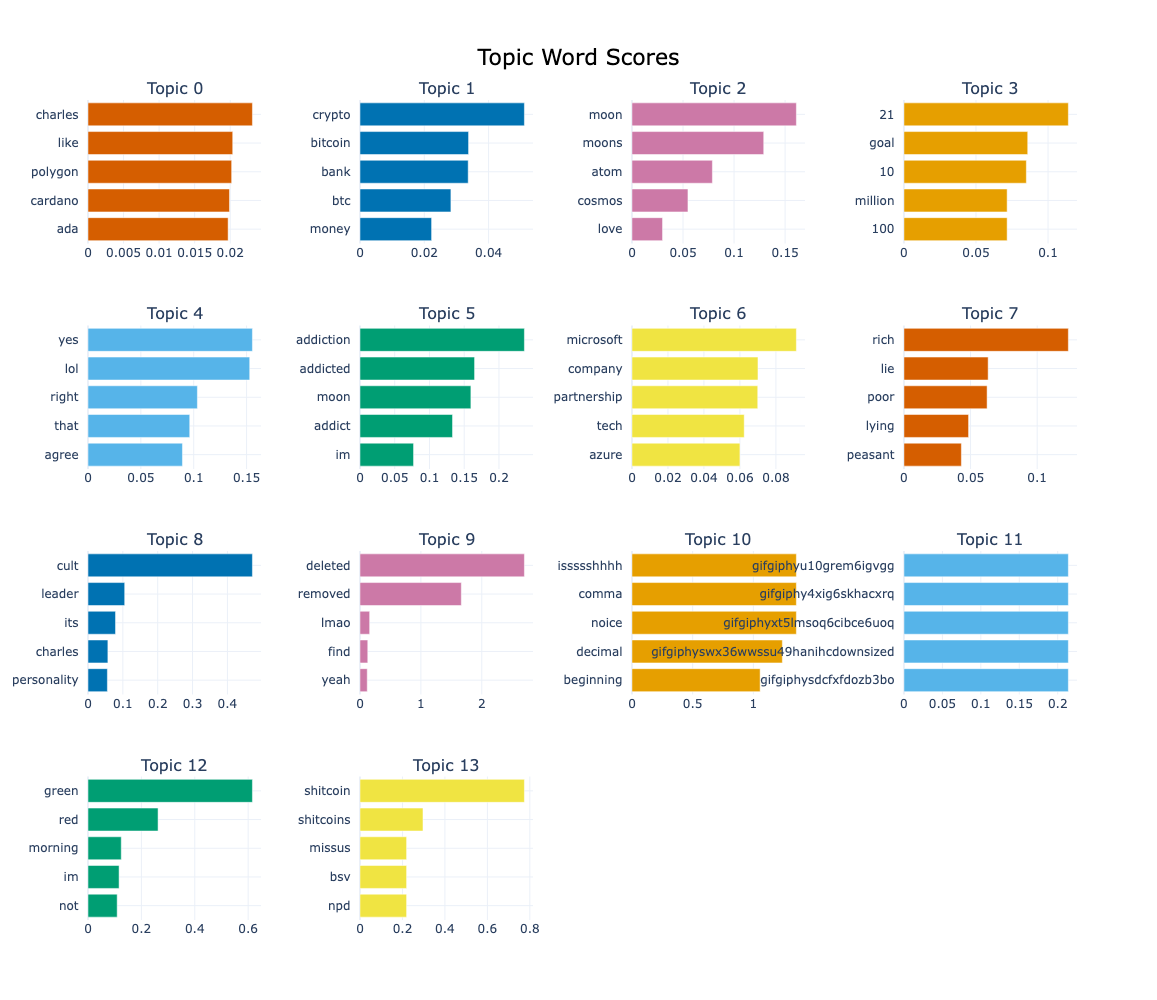

In [17]:
topic_model.visualize_barchart(top_n_topics=15)

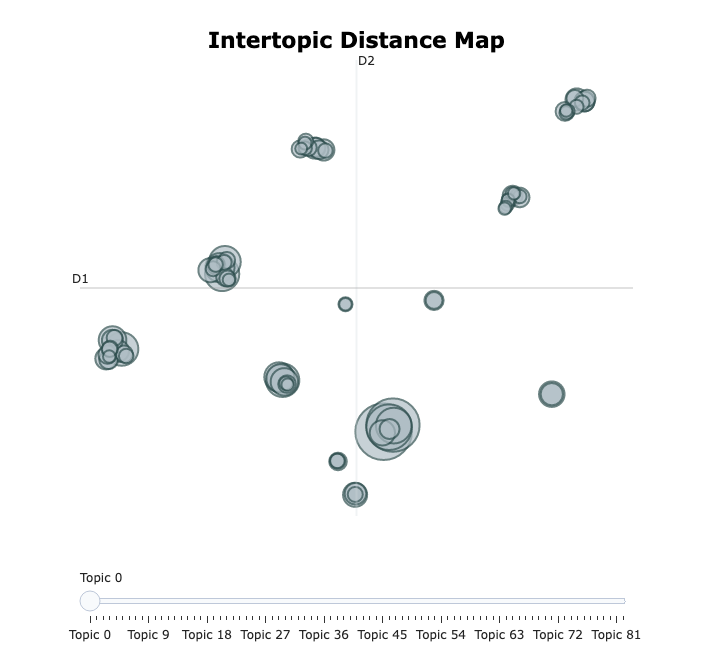

In [11]:
topic_model.visualize_topics()

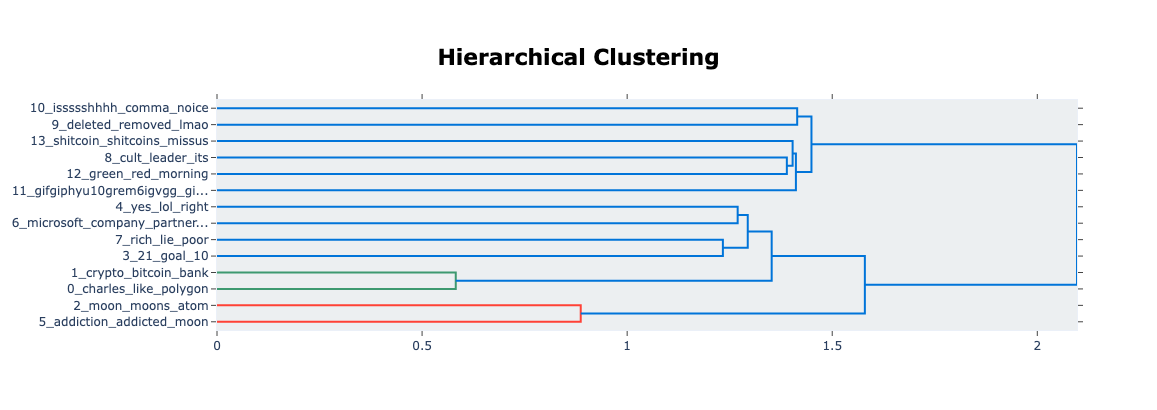

In [18]:
topic_model.visualize_hierarchy(top_n_topics=20)

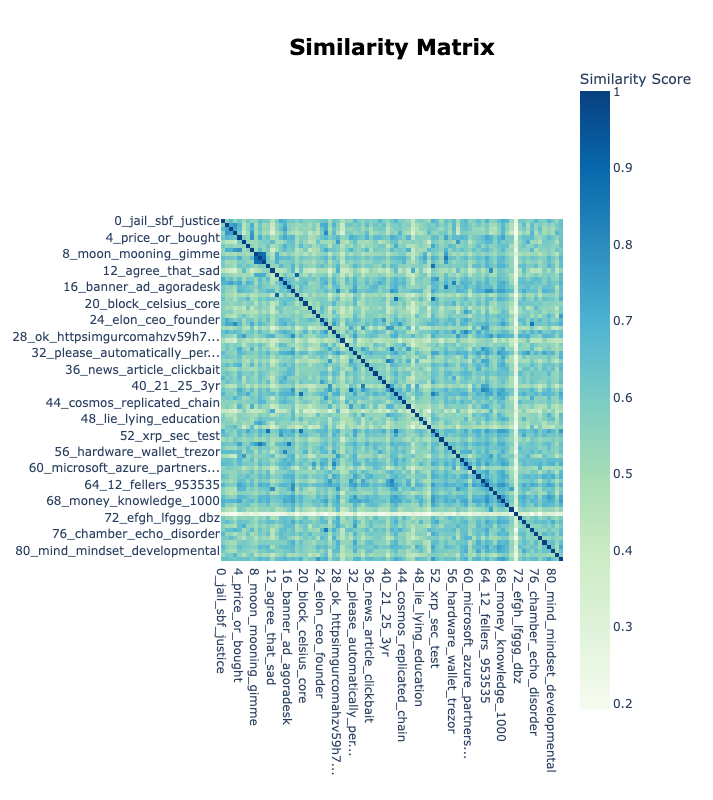

In [13]:
topic_model.visualize_heatmap()

In [19]:
# Get the topic predictions
topic_prediction = topic_model.topics_[:]
# Save the predictions in the dataframe
text_df['topic_prediction'] = topic_prediction
# Take a look at the data
text_df.head()

,Unnamed: 0,title,score,id,subreddit,url,num_comments,body,created,comments,post_url,review_without_stopwords,review_lemmatized,topic_prediction
0,0,Current progress of Bitcoin becoming the most ...,359,1182fqf,Bitcoin,/r/Bitcoin/comments/1182fqf/current_progress_o...,96,NaN,1.676983e+09,"Silver 2024, Gold 2028, Dollar 2032",/r/Bitcoin/comments/1182fqf/current_progress_o...,"Silver 2024, Gold 2028, Dollar 2032","Silver 2024, Gold 2028, Dollar 2032",1
1,1,Current progress of Bitcoin becoming the most ...,359,1182fqf,Bitcoin,/r/Bitcoin/comments/1182fqf/current_progress_o...,96,NaN,1.676983e+09,Here's the rub: gold and especially silver are...,/r/Bitcoin/comments/1182fqf/current_progress_o...,Here's rub: gold especially silver massively u...,Here's rub: gold especially silver massively u...,1
2,2,Current progress of Bitcoin becoming the most ...,359,1182fqf,Bitcoin,/r/Bitcoin/comments/1182fqf/current_progress_o...,96,NaN,1.676983e+09,Greater than gold at some point in our lifetim...,/r/Bitcoin/comments/1182fqf/current_progress_o...,Greater gold point lifetimes seems reasonable ...,Greater gold point lifetime seems reasonable m...,1
3,3,Current progress of Bitcoin becoming the most ...,359,1182fqf,Bitcoin,/r/Bitcoin/comments/1182fqf/current_progress_o...,96,NaN,1.676983e+09,But those are shiny,/r/Bitcoin/comments/1182fqf/current_progress_o...,shiny,shiny,0
4,4,Current progress of Bitcoin becoming the most ...,359,1182fqf,Bitcoin,/r/Bitcoin/comments/1182fqf/current_progress_o...,96,NaN,1.676983e+09,USA Bond Market is also worth $46 trillion. Bi...,/r/Bitcoin/comments/1182fqf/current_progress_o...,USA Bond Market also worth $46 trillion. Bitco...,USA Bond Market also worth $46 trillion. Bitco...,-1
